In [40]:
from collections import defaultdict
import matplotlib.pyplot as plt
import pandas as pd
import ast
import os

In [36]:
file = open(os.path.join("data", "speaker_hallucinating_listener_with_attention.txt"), "r")
content = file.read()
lines = content.split('\n')

## Average utterance length


In [112]:
_utterances = [ast.literal_eval(line) for line in lines if line]

utterances = [None] * len(_utterances)
for index, u in enumerate(_utterances):
    utterances[index] = []
    # Remove <s>, </s> and concatenate +er, +ish, etc..
    special_tokens = ['<s>','</s>']
    for j, token in enumerate(u):
        if token in special_tokens:
            continue
        elif token.startswith('+') and len(utterances[index]):
            utterances[index][-1] = str(utterances[index][-1]) + token.replace('+','')
        else:
            utterances[index].append(token)
            

average_utterance_length = sum([len(u) for u in utterances])/len(utterances)
average_raw_utterance_length = sum([len(u) for u in _utterances])/len(_utterances)

print(f"Example utterance (raw): {' '.join(_utterances[2])}")
print(f"Example utterance (human-like): {' '.join(utterances[2])}")

print(f"Average utterance length (human-like): {average_utterance_length}")
print(f"Average utterance length (actuals tokens): {average_raw_utterance_length}")

Example utterance (raw): <s> light +er blue </s>
Example utterance (human-like): lighter blue
Average utterance length (human-like): 1.7135926461826538
Average utterance length (actuals tokens): 3.956336709507192


## Distribution of utterance lengths

Distribution of utterance lengths


<BarContainer object of 19 artists>

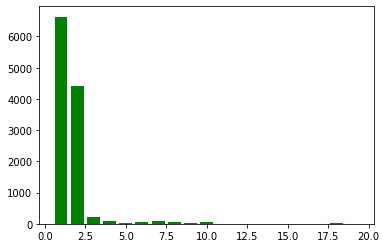

In [95]:
utterance_lengths = defaultdict(int)
for u in utterances:
    utterance_lengths[len(u)] += 1

print('Distribution of utterance lengths')
plt.bar(utterance_lengths.keys(), utterance_lengths.values(), color='g')


## Number of tokens used

In [102]:
tokens = defaultdict(int)
raw_tokens = defaultdict(int)

for u in utterances:
    for token in u:
        tokens[token] += 1
 
for u in _utterances:
    for token in u:
        raw_tokens[token] += 1

In [105]:
print(f'Total human tokens: {len(tokens)}')
print(f'Total actual tokens: {len(raw_tokens)}')


Total human tokens: 197
Total actual tokens: 175


## Token distribution

Most frequent tokens


<BarContainer object of 50 artists>

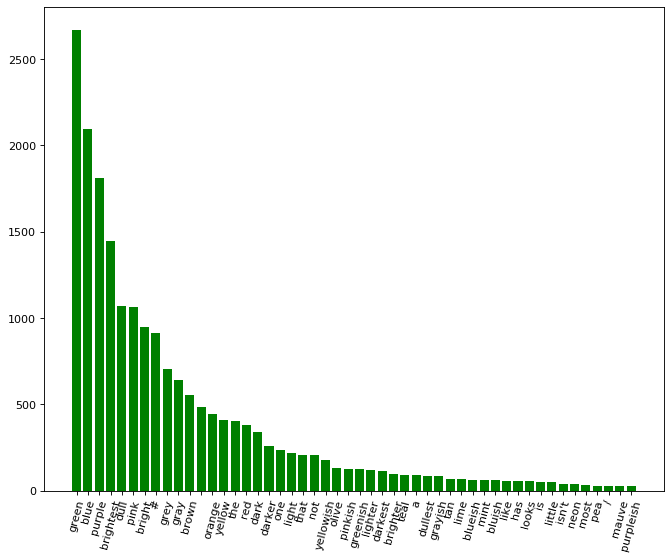

In [100]:

top_n = 50
most_frequent_tokens = dict(sorted(tokens.items(), key=lambda x: x[1], reverse=True)[:50])
from matplotlib.pyplot import figure

figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
print('Most frequent tokens')
plt.xticks(rotation=75)
plt.bar(most_frequent_tokens.keys(), most_frequent_tokens.values(), color='g')


## Structure of medium and long utterances

In [129]:
min_length = 5
long_utterances = [u for u in utterances if len(u) >= min_length]

print(f'{len(long_utterances)}/{len(utterances)} utterances have at least {min_length} words\n')

human_like_strings = defaultdict(int)
print(f"Examples of long utterances:")
for u in long_utterances[:30]:
    human_like_strings[' '.join(u)] += 1
    print(f"• {' '.join(u)}")

print(f'\n\nMost frequent utterances with at least {min_length} words (utterance : count):')
dict(sorted(human_like_strings.items(), key=lambda x: x[1], reverse=True)[:50])    

402/11749 utterances have at least 5 words

Examples of long utterances:
• bright blue that looks like the brighter one
• dark blue that looks like a little brighter one
• darker green , not the brightest
• mint green that looks like the brighter
• grey with a little gray
• dark blue that looks like a bright
• the darker of the three
• grey with a little gray
• dark blue that has a little blue
• tan # # # # with green
• bright green # # # # not the bright green
• dark purple that has a pink tint
• the darker of the three
• pea green that is the most yellow
• yellowish green                
• green # # # # not the blue
• purple # # # # # not the bright purple
• bright green # # # # not the brightest one
• dark blue that has a little purple
• the bright green # # # not the yellowish one
• purple # # # # purple
• dark green that has a little bright
• green # # # # green
• dark blue that looks like a dull
• blue # # # # not sky
• orange # # # # orange ]
• dull purple that does not pink
• t

{'grey with a little gray': 2,
 'the darker of the three': 2,
 'bright blue that looks like the brighter one': 1,
 'dark blue that looks like a little brighter one': 1,
 'darker green , not the brightest': 1,
 'mint green that looks like the brighter': 1,
 'dark blue that looks like a bright': 1,
 'dark blue that has a little blue': 1,
 'tan # # # # with green': 1,
 'bright green # # # # not the bright green': 1,
 'dark purple that has a pink tint': 1,
 'pea green that is the most yellow': 1,
 'yellowish green                ': 1,
 'green # # # # not the blue': 1,
 'purple # # # # # not the bright purple': 1,
 'bright green # # # # not the brightest one': 1,
 'dark blue that has a little purple': 1,
 'the bright green # # # not the yellowish one': 1,
 'purple # # # # purple': 1,
 'dark green that has a little bright': 1,
 'green # # # # green': 1,
 'dark blue that looks like a dull': 1,
 'blue # # # # not sky': 1,
 'orange # # # # orange ]': 1,
 'dull purple that does not pink': 1,
 't

### FastText representations

In [149]:
from gensim.models.fasttext import FastText

embedding_size = 60
window_size = 5
min_word = 5
down_sampling = 1e-2

corpus = utterances

ft_model = FastText(corpus,
                      size=embedding_size,
                      window=window_size,
                      min_count=min_word,
                      sample=down_sampling,
                      sg=1,
                      iter=100)



green:['tan', 'close', 'greenest', 'frog', 'magenta', 'color', 'grass']
blue:['purple', 'blueish', 'last', 'it', 'up', 'gray', 'royal']
purple:['purples', 'pink', 'blue', 'purpleish', 'ink', 'red', 'pumpkin']
brightest:['lightest', 'bluest', 'darkest', 'darker', 'bluish', 'bright', 'yellowish']
dull:['dullest', 'mint', 'dark', 'light', 'bright', 'pea', 'purplish']
pink:['ink', 'teal', 'red', 'purple', 'pinkish', 'pumpkin', 'up']
bright:['dull', 'brighter', 'dark', 'frog', 'brightest', 'dullest', 'reddish']
grey:['greyish', 'gray', 'grayish', 'tint', '', 'purpleish', 'mauve']
gray:['grey', 'blueish', 'tint', 'grayish', 'greyish', 'mauve', 'or']
brown:['orange', '!', 'brownish', 'yellow', 'purple', 'red', 'tan']
orange:['teal', 'brown', 'red', '!', 'magenta', 'gold', 'ink']
yellow:['pea', 'yellowish', 'olive', 'lime', 'brown', 'color', 'up']
the:['$UNK', 'other', 'magenta', 'two', 'neon', 'purples', 'last']
red:['pink', 'ink', 'up', 'orange', 'purples', 'purple', 'frog']
dark:['light', '

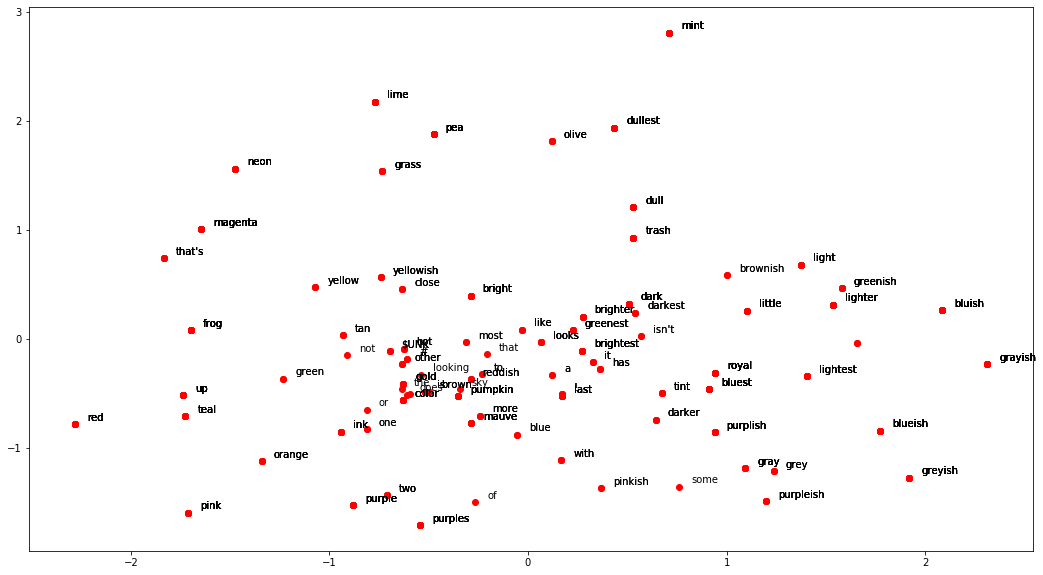

In [151]:
from sklearn.decomposition import PCA

mf_tokens = list(most_frequent_tokens.keys())
remove = ['#', '', 'a', '/']
for r in remove:
    mf_tokens.remove(r)
    
semantically_similar_words = {words: [item[0] for item in ft_model.wv.most_similar([words], topn=7)]
                  for words in mf_tokens + ['sky']}

for k,v in semantically_similar_words.items():
    print(k+":"+str(v))

all_similar_words = sum([[k] + v for k, v in semantically_similar_words.items()], [])
word_vectors = ft_model.wv[all_similar_words]

pca = PCA(n_components=2)

p_comps = pca.fit_transform(word_vectors)
word_names = all_similar_words

plt.figure(figsize=(18, 10))
plt.scatter(p_comps[:, 0], p_comps[:, 1], c='red')

for word_names, x, y in zip(word_names, p_comps[:, 0], p_comps[:, 1]):
    plt.annotate(word_names, xy=(x+0.06, y+0.03), xytext=(0, 0), textcoords='offset points')

['green', 'blue', 'purple', 'brightest', 'dull', 'pink', 'bright', 'grey', 'gray', 'brown', 'orange', 'yellow', 'the', 'red', 'dark', 'darker', 'one', 'light', 'that', 'not', 'yellowish', 'olive', 'pinkish', 'greenish', 'lighter', 'darkest', 'brighter', 'teal', 'dullest', 'grayish', 'tan', 'lime', 'blueish', 'mint', 'bluish', 'like', 'has', 'looks', 'is', 'little', "isn't", 'neon', 'most', 'pea', 'mauve', 'purpleish']
